### 🧪 Step 1: Collect Metrics from Training


In [10]:
accuracy, loss, leakage, latency, epsilon = run_ftl_simulation(num_rounds=10, num_devices=5)


INFO:root:Generated data for 5 devices
INFO:root:Global model compiled with DPKerasSGDOptimizer
INFO:root:Starting round 1
INFO:root:Starting round 2
INFO:root:Starting round 3
INFO:root:Starting round 4
INFO:root:Starting round 5
INFO:root:Starting round 6
INFO:root:Starting round 7
INFO:root:Starting round 8
INFO:root:Starting round 9
INFO:root:Starting round 10


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame({
    'Round': list(range(1, len(accuracy) + 1)),
    'Accuracy': accuracy,
    'Loss': loss,
    'Leakage': leakage,
    'Latency': latency,
    'Epsilon': epsilon
})


In [12]:
def plot_metrics(df):
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.ravel()

    df.plot(x='Round', y='Accuracy', ax=axs[0], marker='o', title='Global Accuracy per Round')
    df.plot(x='Round', y='Loss', ax=axs[1], marker='o', title='Global Loss per Round')
    df.plot(x='Round', y='Leakage', ax=axs[2], marker='o', title='Privacy Leakage')
    df.plot(x='Round', y='Latency', ax=axs[3], marker='o', title='Simulated Latency')
    df.plot(x='Round', y='Epsilon', ax=axs[4], marker='o', title='Privacy Epsilon (DP)')
    fig.delaxes(axs[5])  # Remove empty plot

    plt.tight_layout()
    plt.show()


In [16]:
from ftl_app.ftl_core.evaluation import simulate_inference_attack

attack_success_rate = simulate_inference_attack(num_devices=5)
print(f"Post-Training Inference Accuracy (Simulated Attack Success Rate): {attack_success_rate:.4f}")


Post-Training Inference Accuracy (Simulated Attack Success Rate): 0.6530


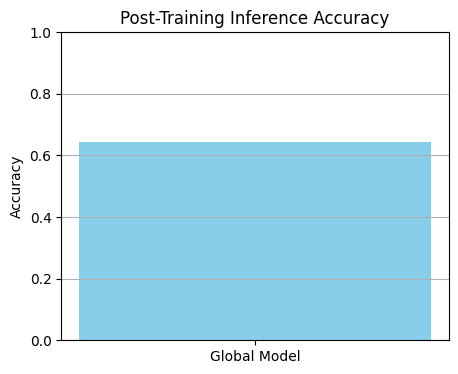

In [15]:
plt.figure(figsize=(5, 4))
plt.bar(['Global Model'], [attack_success_rate], color='skyblue')
plt.title("Post-Training Inference Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


## Methodology

1. **Design and Development:** Use Rapid Application Development (RAD) with iterative prototyping, focusing on requirements planning, user design, construction, and cutover.

2. **Data Collection:** Generate synthetic smart home data mimicking real-world scenarios, ensuring diversity and privacy.

3. **System Architecture:** Implement local model training, global model aggregation, and synchronization, keeping raw data local.

4. **Construction:** Build the FTL model with Python (TensorFlow, PySyft), refining through prototypes.

5. **Cutover:** Transition to a simulated real-world setup and test performance/privacy.

6. **System Testing and Evaluation:** Assess accuracy, loss, communication efficiency, differential privacy guarantees, and information leakage.



### Design and Development (RAD)

a. Requirements Planning
* Functional Requirements: Simulate smart home data, train local models, aggregate globally, evaluate privacy/performance.

* Non-Functional Requirements: Privacy preservation, low latency, scalability.

* Tools: Python, TensorFlow Federated, Django, SQLite (for simplicity).


b. User Design (Iterative Prototyping)
* Design a web interface for testing with feedback loops. Initial prototype focuses on input parameters (rounds, devices, noise) and output metrics/plots.



### Data Collection
Synthetic data generation.



In [ ]:
from ftl_app.ftl_core.ftl_models import run_ftl_simulation
import json

accuracy, loss, leakage, latency, epsilon = run_ftl_simulation(num_rounds=10, num_devices=10, noise_multiplier=1.1)
with open('ftl_app/precomputed/metrics.json', 'w') as f:
    json.dump({
        'accuracy': accuracy, 'loss': loss, 'leakage': leakage, 
        'latency': latency, 'epsilon': epsilon
    }, f)
print("Precomputation completed successfully!")